In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Задание 1

- Постройте график

- Назовите график

- Сделайте именование оси x и оси y

- Сделайте выводы

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [2]:
df = pd.read_csv('kc_house_data.csv', encoding='latin-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

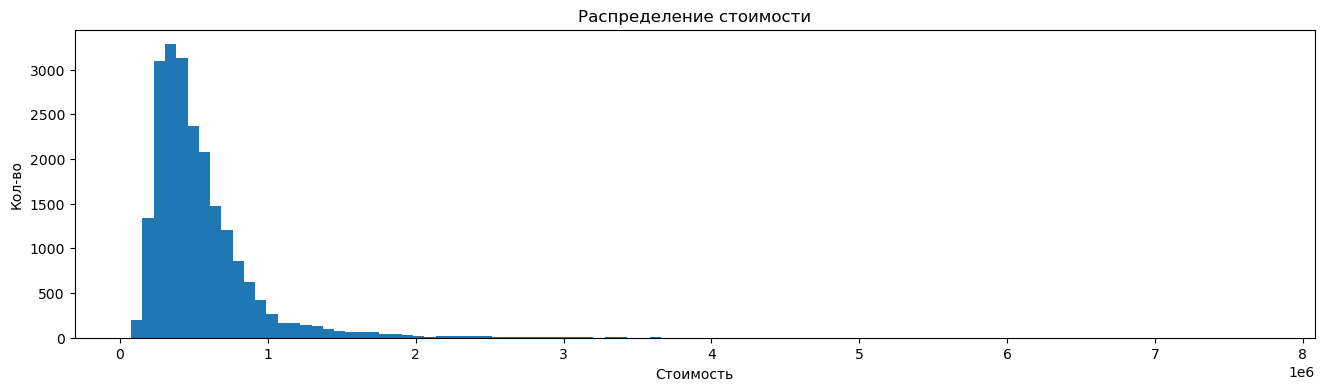

In [3]:
plt.figure(figsize=(16, 4))
plt.hist(df['price'], bins=100)
plt.title('Распределение стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');

####  Вывод: 

Цена основной части недвижимости находится в интервале от 320000 до 645000.

### 1.3 Изучите распределение квадратуры жилой

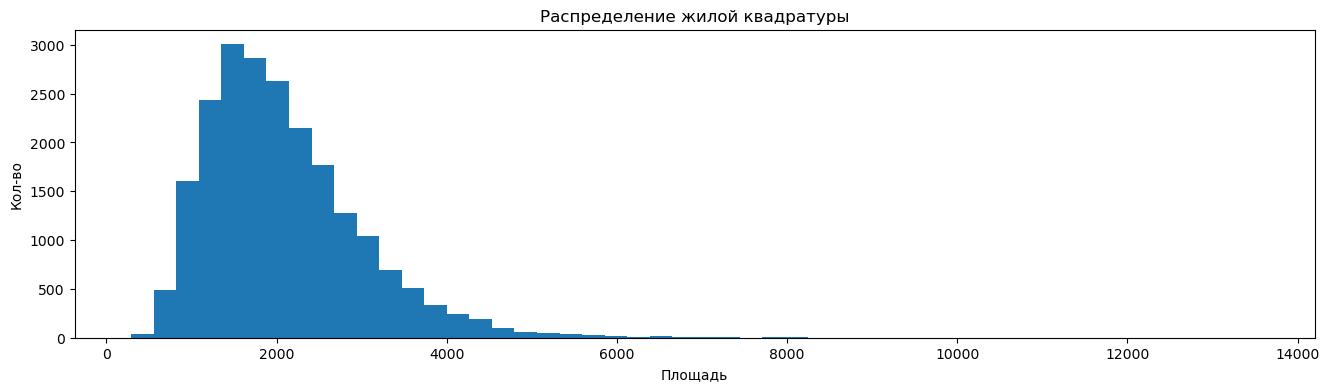

In [4]:
plt.figure(figsize=(16, 4))
plt.hist(df['sqft_living'], bins=50)
plt.title('Распределение жилой квадратуры')
plt.xlabel('Площадь')
plt.ylabel('Кол-во');

####  Вывод: 

Площадь основной части жилой недвижимости находится в интервале от 1427 до 2550.

### 1.4 Изучите распределение года постройки

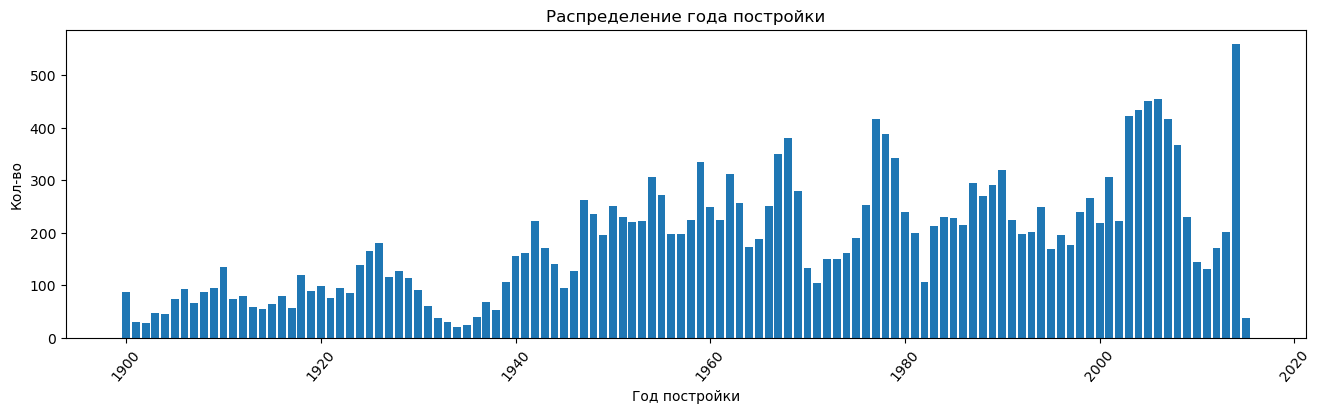

In [5]:
plt.figure(figsize=(16, 4))
data = df['yr_built'].value_counts()
plt.bar(data.index, data. values)
plt.xticks(rotation=50)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');

####  Вывод: 

По графику видно, что недвижимость строилась рывками (волнами). И если смотреть на весь график целиком, то постепенно происходит увеличение объема построек недвижимости. Также на графике видно, что примерно в 1932-1938 годах был спад постройки недвижимости. 

## Задание 2

### 2.1 Изучите распределение домов от наличия вида на набережную

- Постройте график

- Сделайте выводы

In [6]:
data = df['waterfront'].value_counts()
data.index = ['нет вида', 'есть вид']
data

нет вида    21450
есть вид      163
Name: waterfront, dtype: int64

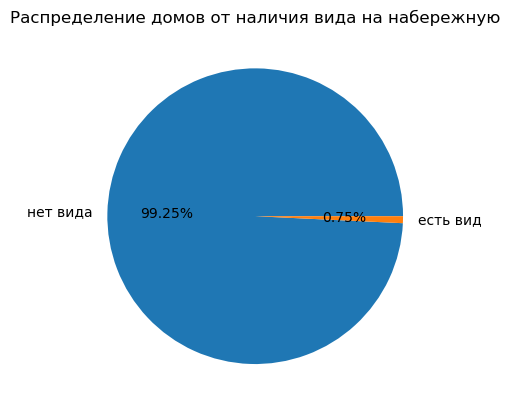

In [7]:
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.title('Распределение домов от наличия вида на набережную');

####  Вывод: 

У менее 1% домомов (от общего количества) есть вид на набережную.

### 2.2 Изучите распределение этажей домов

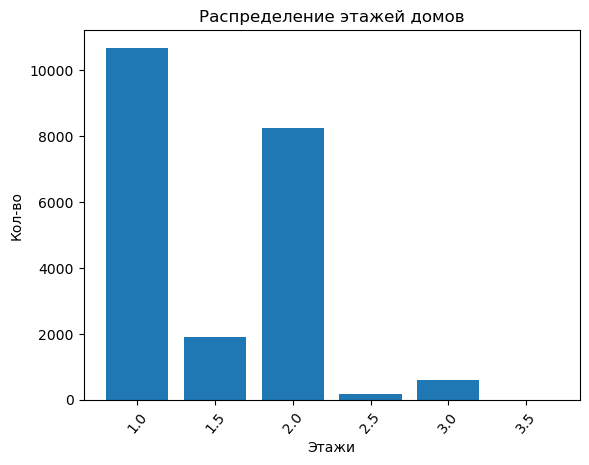

In [8]:
data = df['floors'].value_counts()
plt. bar(data.index, data. values, width=0.4)
plt. xticks(rotation=50)
plt.title('Распределение этажей домов')
plt.xlabel('Этажи')
plt.ylabel('Кол-во');

####  Вывод: 

Большинство домов с 1 и 2 этажами.

### 2.2 Изучите распределение состояния домов

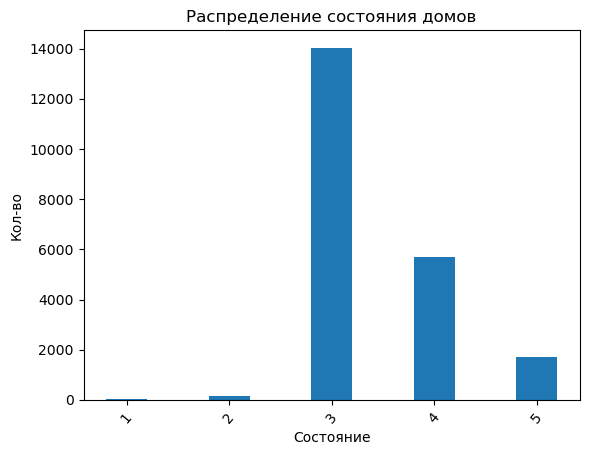

In [9]:
data = df['condition'].value_counts()
plt. bar(data.index, data. values, width=0.4)
plt. xticks(rotation=50)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Кол-во');

####  Вывод: 

Большинство домов имеет состояние с оценкой 3.

## Задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

#### Примечание:

Построим матрицу корреляций для таблицы, чтобы посмотреть в целом зависимость одних показателей от других. На основе этого уже будем строить конкретные графики.

In [10]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)

In [11]:
sns.set(rc = {'figure.figsize':(16,8)})

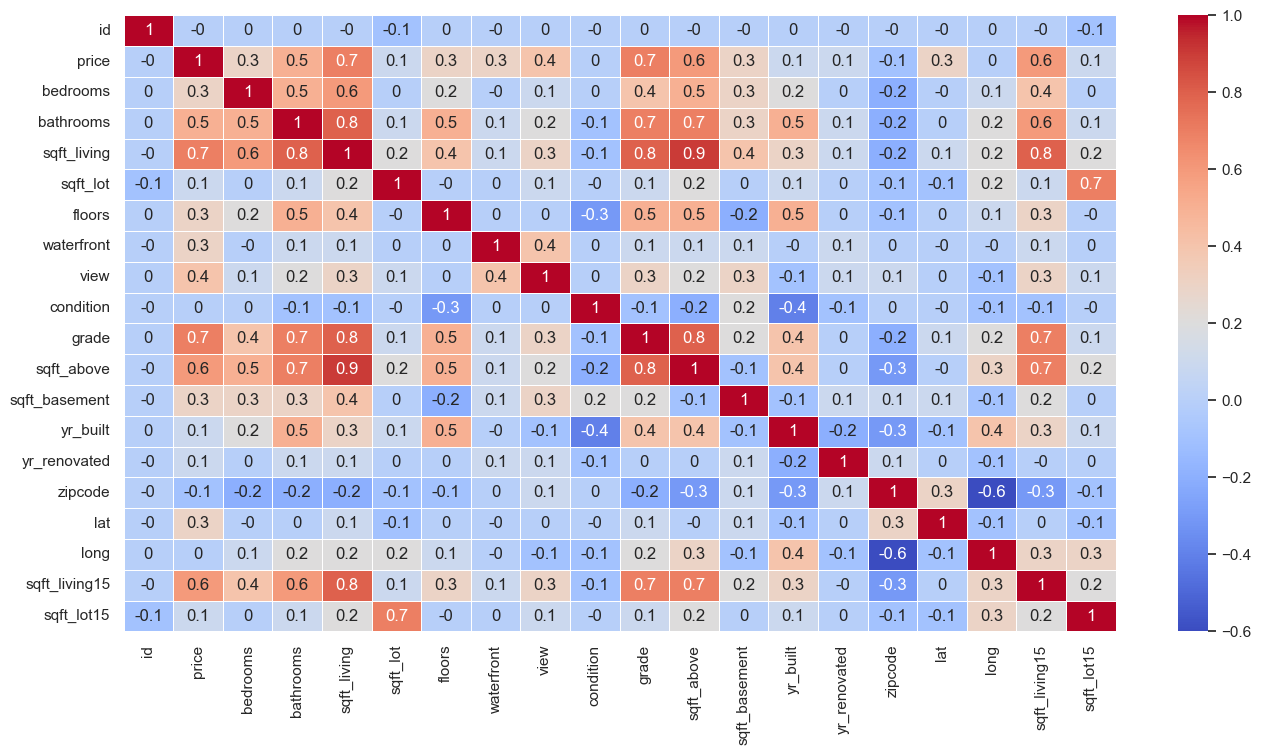

In [12]:
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

#### Примечание:

Согласно матрицы корреляций, у **price** наблюдаются линейные зависимости от **bathrooms** (0.5), **grade** (0.7), **view** (0.4). Также дополнительно рассмотрим зависимость **price** от **condition** (0), где линейная зависимость отсутствует. И от **waterfront** (0.3)

### 3.1 Взаимосвязь *price* и *bathrooms* (0.5)

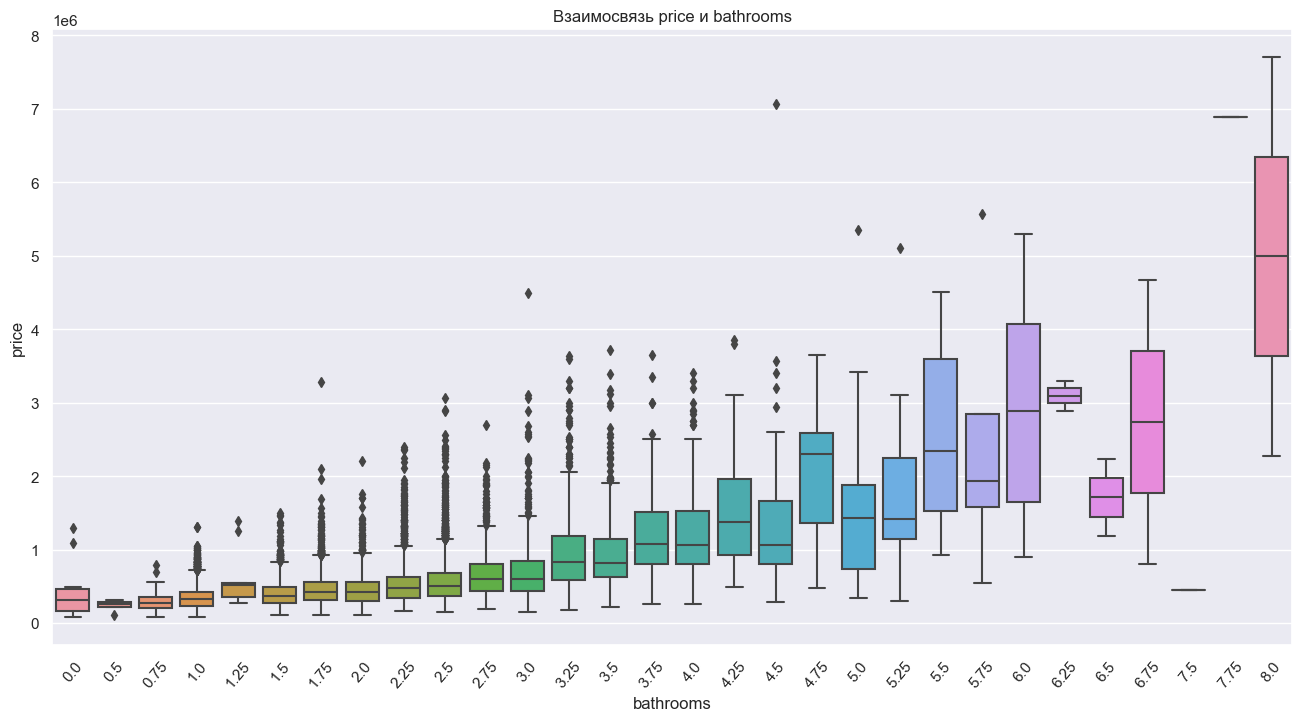

In [13]:
sns.boxplot(x=df['bathrooms'], y=df['price'])
plt.title('Взаимосвязь price и bathrooms')
plt. xticks(rotation=50);

####  Вывод: 

Есть предположение, что с увеличением bathrooms, стоимость дома тоже увеличивается.

### 3.2 Взаимосвязь *price* и *grade* (0.7)

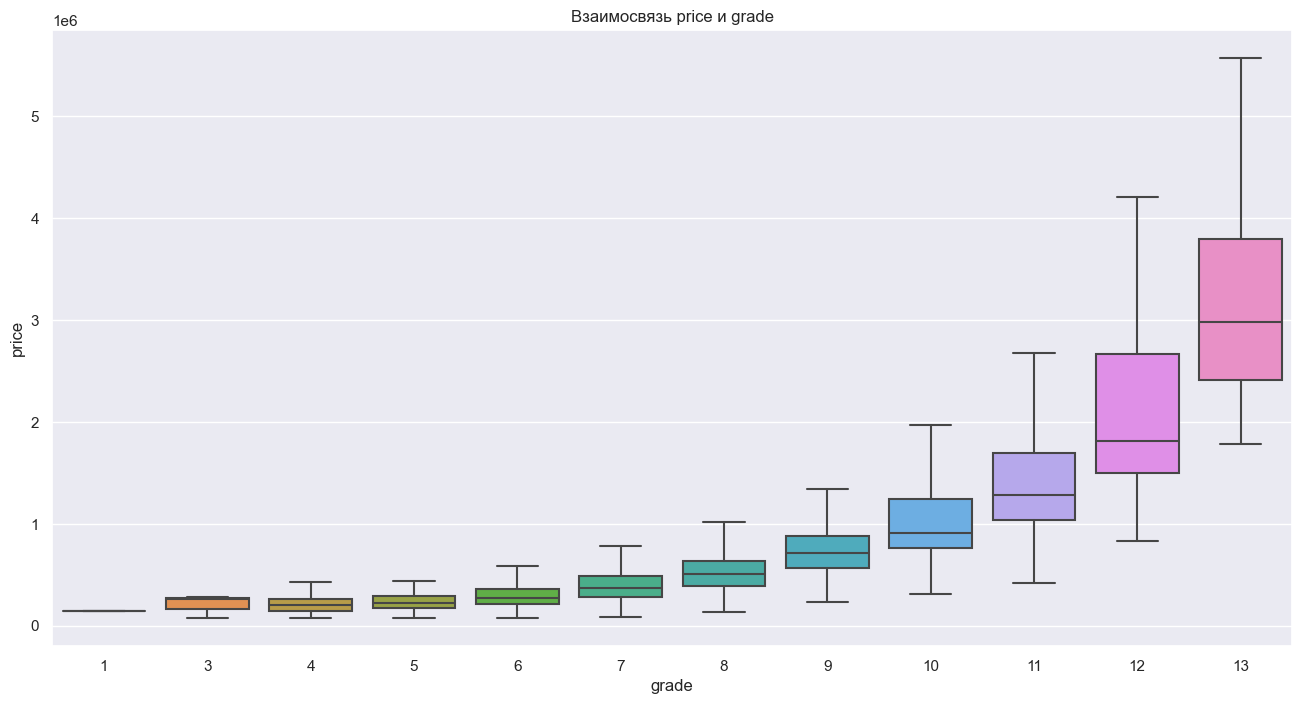

In [14]:
sns.boxplot(x=df['grade'], y=df['price'], showfliers=False)
plt.title('Взаимосвязь price и grade');

####  Вывод: 

Чем выше оценка дома, тем выше стоимость дома.

### 3.2 Взаимосвязь *price* и *view* (0.4)

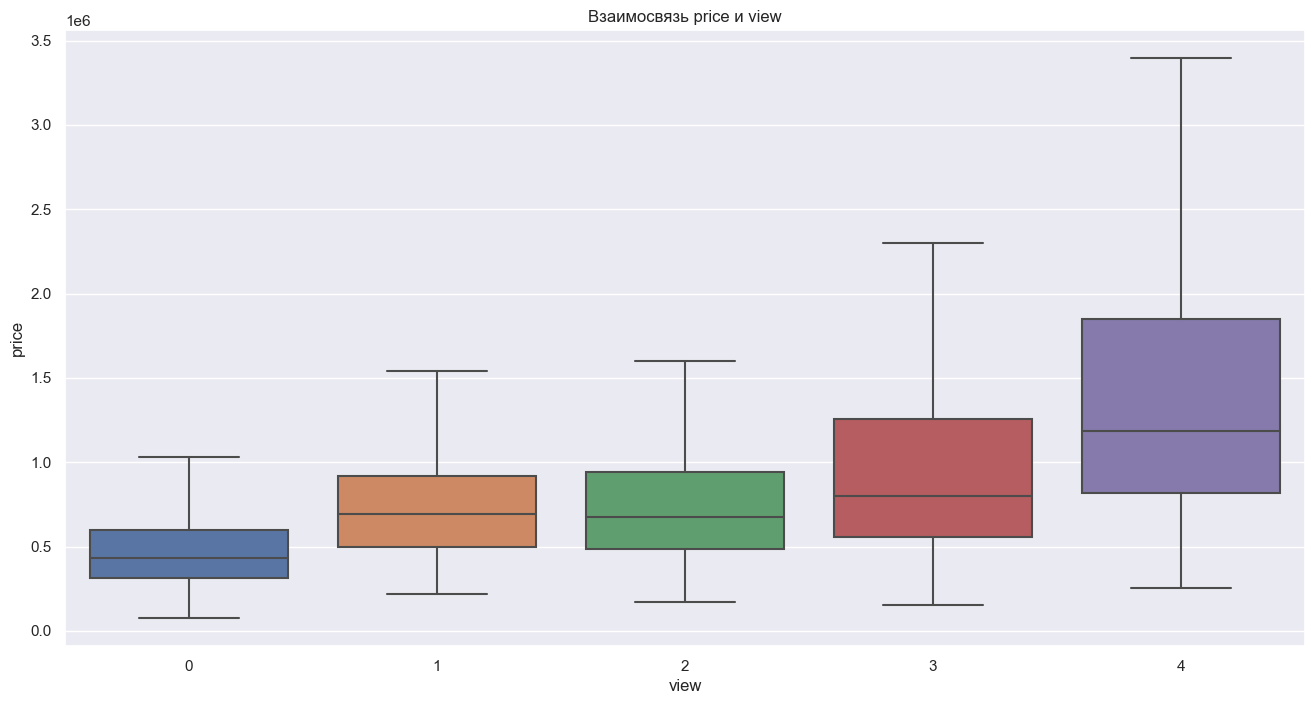

In [15]:
sns.boxplot(x=df['view'], y=df['price'], showfliers=False)
plt.title('Взаимосвязь price и view');

####  Вывод: 

Чем лучше вид, тем выше стоимость дома.

### 3.3 Взаимосвязь *price* и *condition* (0)

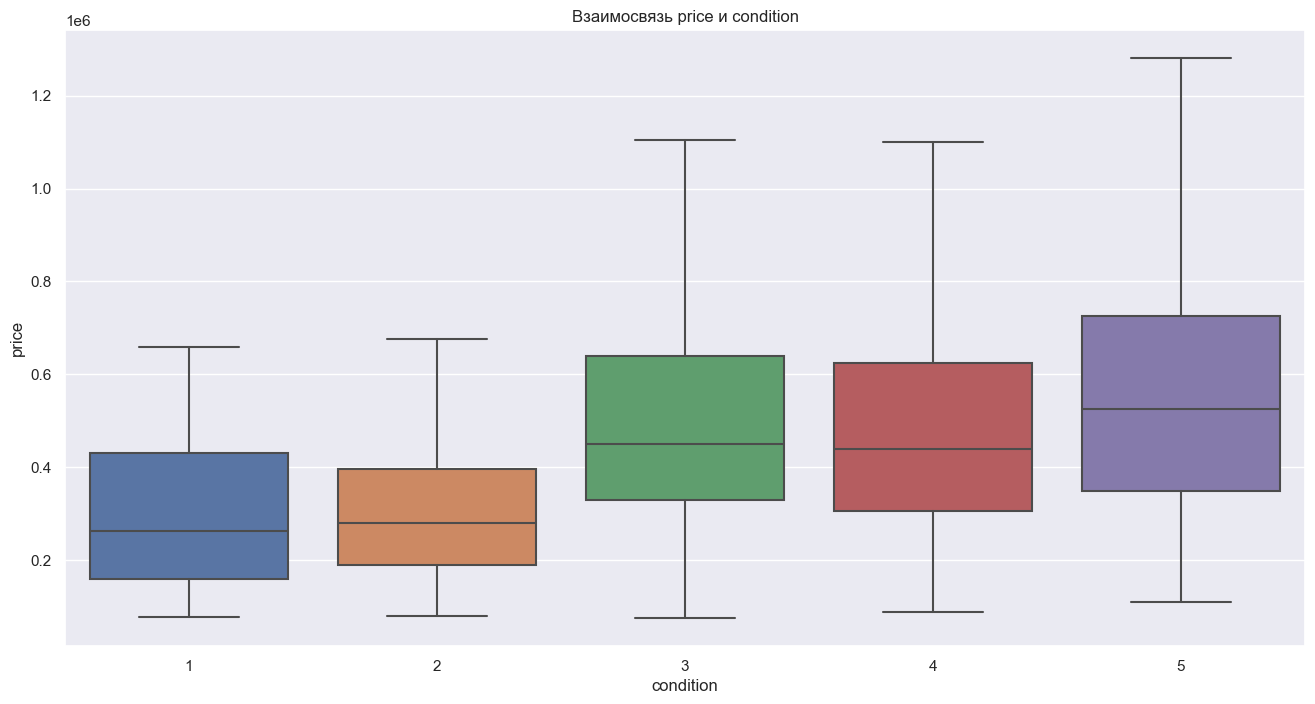

In [16]:
sns.boxplot(x=df['condition'], y=df['price'], showfliers=False)
plt.title('Взаимосвязь price и condition');

####  Вывод: 

Хоть и коэффициент корреляции показыввает 0, всё же на графике (отбросив выбросы), наблюдается увеличение стоимости домов с улучшением состояния дома. 

### 3.4 Взаимосвязь *price* и *waterfront* (0.3)

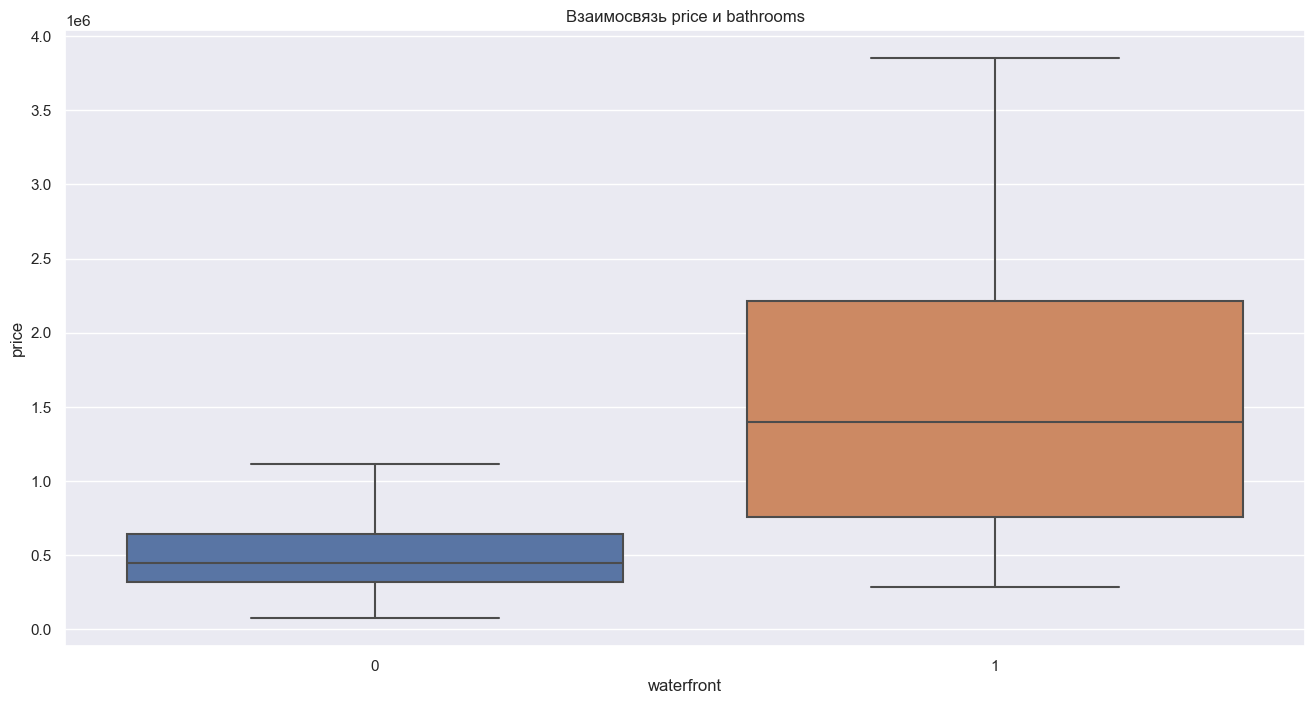

In [17]:
sns.boxplot(x=df['waterfront'], y=df['price'], showfliers=False)
plt.title('Взаимосвязь price и bathrooms');

####  Вывод: 

В среднем (по медиане) дома с видом на набережную стоят в районе 1400000, а дома без вида в среднем стоят в райне 450000.